In [1]:
%run ../src/start.py


python	3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
---------------------
Versions:
----------------------
pandas      1.1.2
numpy       1.19.1
matplotlib  3.3.1
seaborn     0.11.0
plotly      4.11.0
----------------------


Loaded Libraries
-------------------
import pandas as pd
import numpy as np
import sys,os
import re
import glob
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
----------------


GLOBAL VARIABLES
--------------------------
HERE_DIR: list current directory path
RAW_DIR: list files in `data\raw` directory
INTER_DIR: list files in `data\interim` directory
FINAL_DIR: list files in `data\final` directory
SRC_DIR: list files in `src\` directory
------------------------------

# SAVE PLOTS
To save a plot call
`save_plots(fig_variable,'name_of_plot')`

source file: src/start.py




In [2]:
ls ../data/raw/crime_data/2018/csv

 apr18.xlsx*   feb18.xlsx*   jan18.xlsx*  'mar 18.xlsx'*   may18.xlsx*


In [3]:
path = '2018/csv'
raw_directory = os.path.join('..','data','raw','crime_data',f'{path}/')

In [4]:
all_files = glob.glob(os.path.join(raw_directory, "*.xlsx")) # change "*.xlsx" for excel files
df_from_each_file = (pd.read_excel(f, engine='openpyxl') for f in all_files)    # change to `pd.read_excel(f)` for excel files
df   = pd.concat(df_from_each_file, ignore_index=True)     # combine into one large dataframe

# cleanup columns
#df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('\n','_').str.strip()
# df.columns = df.columns.str.strip().str.lower().str.replace('-', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [5]:
df.head()

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,Offenses
0,04/03/2018,14,Theft,10H10,Commercial Building,5900-5999,HARRISBURG,-,-,1
1,04/05/2018,7,Theft,10H10,"Road, Street, or Sidewalk",300-399,DELMAR,ST,-,1
2,04/05/2018,17,Theft,10H10,Apartment,2100-2199,RUNNELS,-,-,1
3,04/05/2018,17,Theft,10H10,Bar or Night Club Parking Lot,2400-2499,NAVIGATION,BLVD,-,1
4,04/07/2018,4,Aggravated Assault,10H10,Residence or House,3300-3399,NAVIGATION,BLVD,-,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47015 entries, 0 to 47014
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          47015 non-null  object
 1   Hour          47015 non-null  int64 
 2   Offense Type  47015 non-null  object
 3   Beat          47015 non-null  object
 4   Premise       47015 non-null  object
 5   Block Range   47015 non-null  object
 6   Street Name   47014 non-null  object
 7   Type          47015 non-null  object
 8   Suffix        47015 non-null  object
 9   Offenses      47015 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.6+ MB


# Show null data

In [7]:
df.apply(lambda x: sum(x.isnull()))

Date            0
Hour            0
Offense Type    0
Beat            0
Premise         0
Block Range     0
Street Name     1
Type            0
Suffix          0
Offenses        0
dtype: int64

In [8]:
# create null percentage of column as dataframe
null_per_df = pd.DataFrame(df.isna().mean().round(4) * 100)
# rename columns
null_per_df.rename(columns={'index': 'col_name', 0: 'null_percent'}, inplace=True)

# filter data <20% null values
per_filter = null_per_df.null_percent<=90
null_per_df[per_filter].sort_values(by='null_percent',ascending=False)

,null_percent
Date,0.0
Hour,0.0
Offense Type,0.0
Beat,0.0
Premise,0.0
Block Range,0.0
Street Name,0.0
Type,0.0
Suffix,0.0
Offenses,0.0


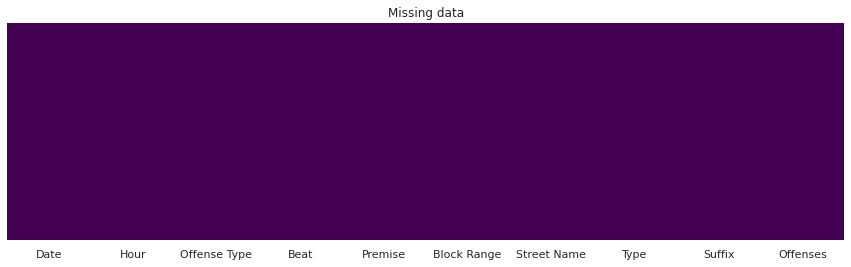

In [9]:
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing data')
plt.show()

In [10]:
df.columns.tolist()

['Date',
 'Hour',
 'Offense Type',
 'Beat',
 'Premise',
 'Block Range',
 'Street Name',
 'Type',
 'Suffix',
 'Offenses']

In [12]:
# df['block_range'] = pd.concat([df['Block Range'].dropna(),
#                               df['BlockRange'].dropna()]).reindex_like(df)

# df['street_name'] = pd.concat([df['Street Name'].dropna(),
#                               df['StreetName'].dropna()]).reindex_like(df)

# df['offenses'] = pd.concat([df['. offenses'].dropna(),
#                               df['Offenses'].dropna()]).reindex_like(df)

In [13]:
# # combine columns into a new one
# df['offenses'] = pd.concat([df['. Of Offenses'].dropna(),
#                               df['. of Offenses'].dropna()]).reindex_like(df)

# # drop columns
# df = df.drop(['. Of Offenses','. of Offenses', 'Field11',
#  'Field12',
#  'Field13'], axis = 1)

In [ ]:
df = df.drop([  'Block Range',
 'BlockRange','Street Name','StreetName','. offenses','Offenses'], axis = 1)

In [14]:
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('\n','_').str.strip()

In [15]:
df.apply(lambda x: sum(x.isnull()))

date            0
hour            0
offense_type    0
beat            0
premise         0
block_range     0
street_name     1
type            0
suffix          0
offenses        0
dtype: int64

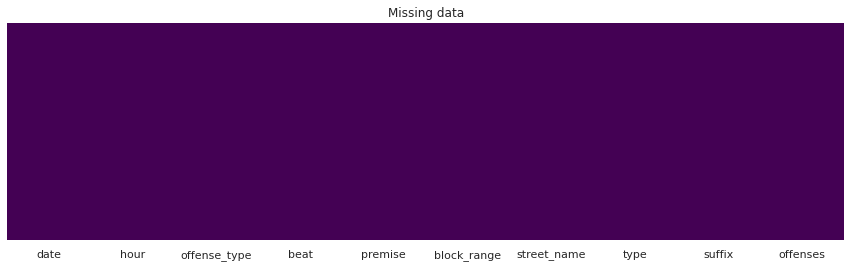

In [16]:
plt.figure(figsize=(15,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing data')
plt.show()

In [ ]:
df.head()

In [ ]:
df.info()

## Combine date & hour to one column

In [ ]:
df[['date','hour']]

In [17]:
# convert two columns into one datetime
df['date_time'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['hour'], unit='h')

# drop columns
df = df.drop(['date','hour'], axis = 1)

In [18]:
df.head()

,offense_type,beat,premise,block_range,street_name,type,suffix,offenses,date_time
0,Theft,10H10,Commercial Building,5900-5999,HARRISBURG,-,-,1,2018-04-03 14:00:00
1,Theft,10H10,"Road, Street, or Sidewalk",300-399,DELMAR,ST,-,1,2018-04-05 07:00:00
2,Theft,10H10,Apartment,2100-2199,RUNNELS,-,-,1,2018-04-05 17:00:00
3,Theft,10H10,Bar or Night Club Parking Lot,2400-2499,NAVIGATION,BLVD,-,1,2018-04-05 17:00:00
4,Aggravated Assault,10H10,Residence or House,3300-3399,NAVIGATION,BLVD,-,1,2018-04-07 04:00:00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47015 entries, 0 to 47014
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   offense_type  47015 non-null  object        
 1   beat          47015 non-null  object        
 2   premise       47015 non-null  object        
 3   block_range   47015 non-null  object        
 4   street_name   47014 non-null  object        
 5   type          47015 non-null  object        
 6   suffix        47015 non-null  object        
 7   offenses      47015 non-null  int64         
 8   date_time     47015 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 3.2+ MB


In [20]:
#change column name

# df.rename(columns={
#     '._offenses': 'offenses',
# }, inplace=True)

# convert offenses to int

df['offenses'] = df['offenses'].astype('int64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47015 entries, 0 to 47014
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   offense_type  47015 non-null  object        
 1   beat          47015 non-null  object        
 2   premise       47015 non-null  object        
 3   block_range   47015 non-null  object        
 4   street_name   47014 non-null  object        
 5   type          47015 non-null  object        
 6   suffix        47015 non-null  object        
 7   offenses      47015 non-null  int64         
 8   date_time     47015 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 3.2+ MB


In [22]:
df.head()

,offense_type,beat,premise,block_range,street_name,type,suffix,offenses,date_time
0,Theft,10H10,Commercial Building,5900-5999,HARRISBURG,-,-,1,2018-04-03 14:00:00
1,Theft,10H10,"Road, Street, or Sidewalk",300-399,DELMAR,ST,-,1,2018-04-05 07:00:00
2,Theft,10H10,Apartment,2100-2199,RUNNELS,-,-,1,2018-04-05 17:00:00
3,Theft,10H10,Bar or Night Club Parking Lot,2400-2499,NAVIGATION,BLVD,-,1,2018-04-05 17:00:00
4,Aggravated Assault,10H10,Residence or House,3300-3399,NAVIGATION,BLVD,-,1,2018-04-07 04:00:00


# Inspect evry column

In [ ]:
def create_new_cell(contents):
    '''created new jupyter cells by inputing a list of columns
    outputs'''
    from IPython.core.getipython import get_ipython
    shell = get_ipython()
    payload = dict(
        source='set_next_input',
        #text=f'#column:{contents}\ndf.{contents}.value_counts(dropna=False)[:10]'.format(contents),
        text=f'# column:{contents}\ndf.{contents}.value_counts(dropna=False)[:10]',
        replace=False,)
    shell.payload_manager.write_payload(payload, single=False)

    
def strip_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df.col = df[col].str.strip()
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))    
    
def lower_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df.col = df[col].str.lower()
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))       
    
    
    
def capital_col(col):
    print(f'column:{col}')
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))
    df.col = df[col].str.capitalize()
    print('before:{}'.format(len(df[col].value_counts(dropna=False))))      

In [ ]:
col_list = df.columns.tolist()
col_list

In [ ]:
for col in col_list:
    create_new_cell(col)

In [ ]:
# column:date_time
df.date_time.value_counts(dropna=False)[:10]

In [ ]:
# column:offenses
df.offenses.value_counts(dropna=False)[:10]

In [ ]:
# column:suffix
df.suffix.value_counts(dropna=False)[:10]

In [ ]:
# column:type
df.type.value_counts(dropna=False)[:10]

In [ ]:
# column:street_name
df.street_name.value_counts(dropna=False)[:10]

In [ ]:
# column:block_range
df.block_range.value_counts(dropna=False)[:10]

In [ ]:
# column:premise
df.premise.value_counts(dropna=False)[:10]

In [ ]:
# column:beat
df.beat.value_counts(dropna=False)[:10]

In [ ]:
# column:offense_type
df.offense_type.value_counts(dropna=False)[:10]

In [23]:
df.rename(columns={'blockrange': 'block_range', 'streetname': 'street_name'}, inplace=True)

col_ord =['date_time','offenses','offense_type', 'block_range', 'street_name', 'type', 'suffix','beat', 'premise']
df = df[col_ord]



file = 'crime_2018.csv'
directory_save = os.path.join('..','data','interim',f'{file}')
df.to_csv(directory_save,index=False)

In [24]:
df

,date_time,offenses,offense_type,block_range,street_name,type,suffix,beat,premise
0,2018-04-03 14:00:00,1,Theft,5900-5999,HARRISBURG,-,-,10H10,Commercial Building
1,2018-04-05 07:00:00,1,Theft,300-399,DELMAR,ST,-,10H10,"Road, Street, or Sidewalk"
2,2018-04-05 17:00:00,1,Theft,2100-2199,RUNNELS,-,-,10H10,Apartment
3,2018-04-05 17:00:00,1,Theft,2400-2499,NAVIGATION,BLVD,-,10H10,Bar or Night Club Parking Lot
4,2018-04-07 04:00:00,1,Aggravated Assault,3300-3399,NAVIGATION,BLVD,-,10H10,Residence or House
...,...,...,...,...,...,...,...,...,...
47010,2018-05-27 03:00:00,1,Robbery,4100-4199,DARWIN,-,-,UNK,"Road, Street, or Sidewalk"
47011,2018-05-28 22:00:00,1,Theft,17700-17799,EASTEX,FWY,-,UNK,Apartment Parking Lot
47012,2018-05-28 22:00:00,1,Theft,900-999,ST EMANUEL,-,-,UNK,Other Parking Lot
47013,2018-05-30 23:00:00,1,AutoTheft,10800-10899,SHADY,LN,-,UNK,Service or Gas Station
